*Use this notebook to complete the sentence similarity and embedding visualization tasks.*


In [1]:
import pickle
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

import nltk
from nltk.tokenize import word_tokenize

import warnings
warnings.filterwarnings("ignore")


nltk.download('punkt')
nltk.download('punkt_tab')

def tokenize_text(text):
    return word_tokenize(text.lower())

# List of sentences for comparison
sentences = [
    "The cat sat on the mat.",
    "A dog is playing in the yard.",
    "I need to buy groceries today.",
    "The feline was resting on the rug.",
    "Canines enjoy outdoor activities.",
    "My shopping list includes milk and bread.",
    "The weather is beautiful today.",
    "Programming requires logical thinking."
]

# Query sentence
query = "My pet cat is sleeping on the carpet."

[nltk_data] Downloading package punkt to /home/pjb0377/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/pjb0377/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [2]:
embeddings_sources = {
    'custom_word2vec': 'word2vec_embeddings.pkl',
    'gensim_word2vec': 'word2vec_gensim_embeddings.pkl'
}

loaded_embeddings = {}
for name, file in embeddings_sources.items():
    with open(file, 'rb') as f:
        data = pickle.load(f)
    loaded_embeddings[name] = {
        'embeddings': data['embeddings'],
        'word2idx': data['word2idx'],
        'idx2word': data['idx2word']
    }

def get_vector(word, emb_data):
    idx = emb_data['word2idx'].get(word)
    if idx is None:
        return None
    return emb_data['embeddings'][idx]

def get_sentence_embedding(sentence, emb_data):
    tokens = tokenize_text(sentence)
    vectors = []
    for token in tokens:
        vec = get_vector(token, emb_data)
        if vec is not None:
            vectors.append(vec)
    if not vectors:
        return np.zeros(emb_data['embeddings'].shape[1])
    return np.mean(vectors, axis=0)


for source_name, emb_data in loaded_embeddings.items():
    print(f"\nUsing {source_name}:")
    
    query_emb = get_sentence_embedding(query, emb_data)
    
    similarities = []
    for sent in sentences:
        sent_emb = get_sentence_embedding(sent, emb_data)
        sim = cosine_similarity([query_emb], [sent_emb])[0][0]
        similarities.append(sim)
        print(f"Similarity to '{sent}': {sim:.4f}")
    
    print(f"Highest similarity: {max(similarities):.4f} for sentence {np.argmax(similarities)}")
    print(f"Lowest similarity: {min(similarities):.4f} for sentence {np.argmin(similarities)}")



Using custom_word2vec:
Similarity to 'The cat sat on the mat.': 0.5824
Similarity to 'A dog is playing in the yard.': 0.4231
Similarity to 'I need to buy groceries today.': 0.3042
Similarity to 'The feline was resting on the rug.': 0.4019
Similarity to 'Canines enjoy outdoor activities.': 0.1016
Similarity to 'My shopping list includes milk and bread.': 0.3996
Similarity to 'The weather is beautiful today.': 0.3049
Similarity to 'Programming requires logical thinking.': 0.1439
Highest similarity: 0.5824 for sentence 0
Lowest similarity: 0.1016 for sentence 4

Using gensim_word2vec:
Similarity to 'The cat sat on the mat.': 0.6933
Similarity to 'A dog is playing in the yard.': 0.5849
Similarity to 'I need to buy groceries today.': 0.1784
Similarity to 'The feline was resting on the rug.': 0.4859
Similarity to 'Canines enjoy outdoor activities.': 0.0396
Similarity to 'My shopping list includes milk and bread.': 0.4473
Similarity to 'The weather is beautiful today.': 0.4939
Similarity to 

Comparison across embedding sources:
The custom word2vec and gensim word2vec may capture sentence-level meaning differently due to training data and parameters. Because it was trained for longer and benefited from more thorough fine-tuning, the gensim Word2Vec embeddings appear to capture sentence-level meaning better in this example—especially in distinguishing sentences that are semantically similar to the query from those that are not. Overall, both embedding methods agree that sentences 1, 2, 4, 6, and 7 are relatively similar to the query, while sentences 3, 5, and 8 are comparatively dissimilar.


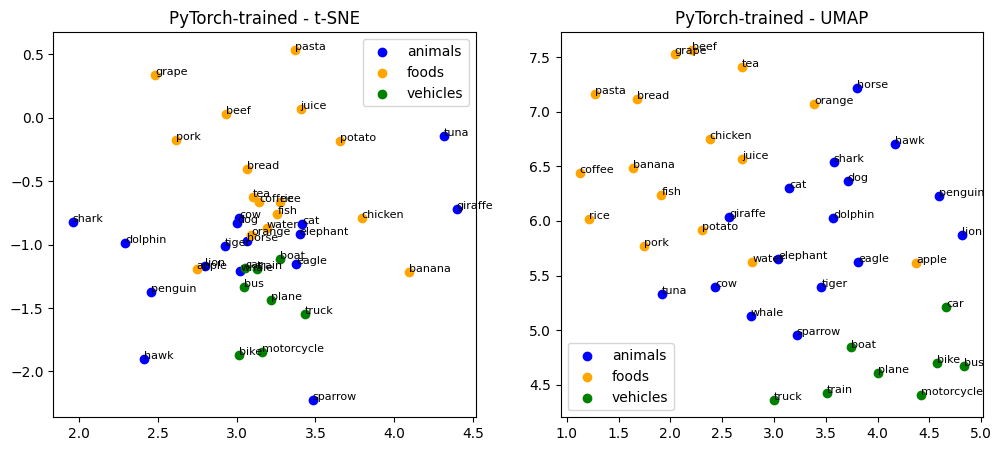

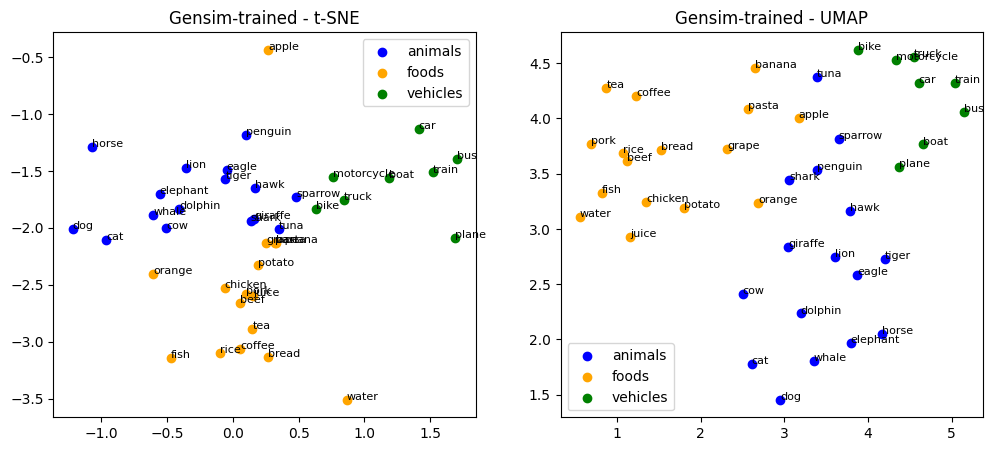

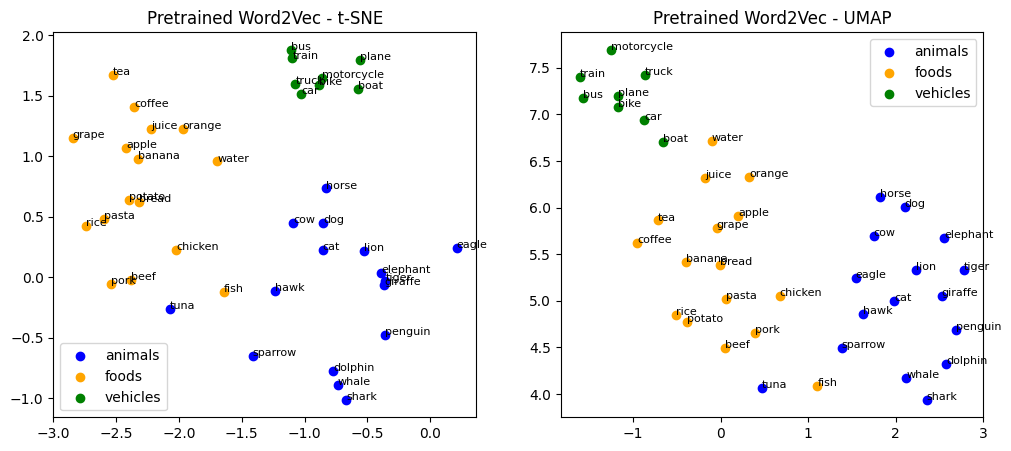

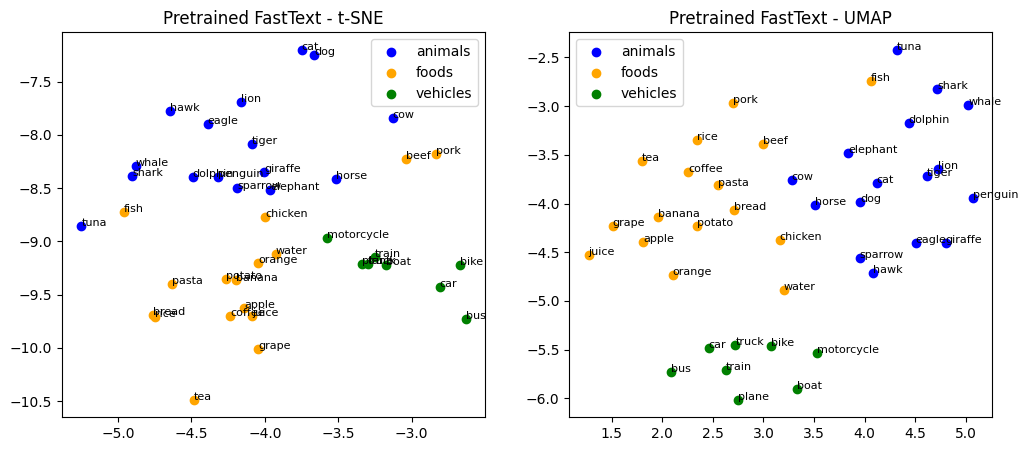

In [3]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap
from gensim.models import KeyedVectors
import numpy as np


animals = [
    'dog', 'cat', 'horse', 'cow',
    'lion', 'tiger', 'elephant', 'giraffe',
    'eagle', 'hawk', 'sparrow', 'penguin',
    'shark', 'whale', 'dolphin', 'tuna'
]

foods = [
    'apple', 'orange', 'banana', 'grape',
    'bread', 'pasta', 'rice', 'potato',
    'chicken', 'beef', 'pork', 'fish',
    'coffee', 'tea', 'juice', 'water'
]

vehicles = ['car', 'truck', 'bus', 'bike', 'train', 'plane', 'boat', 'motorcycle']

categories = {
    'animals': (animals, 'blue'),
    'foods': (foods, 'orange'),
    'vehicles': (vehicles, 'green')
}


embedding_sources = {
    'PyTorch-trained': 'word2vec_embeddings.pkl',
    'Gensim-trained': 'word2vec_gensim_embeddings.pkl',
    'Pretrained Word2Vec': 'word2vec-google-news-300.model',
    'Pretrained FastText': 'fasttext-wiki-news-subwords-300.model'
}

loaded_embeddings = {}

for name, file in embedding_sources.items():
    if file.endswith('.pkl'):
        with open(file, 'rb') as f:
            data = pickle.load(f)
        loaded_embeddings[name] = {
            'type': 'pickle',
            'embeddings': data['embeddings'],
            'word2idx': data['word2idx'],
            'idx2word': data['idx2word']
        }
    else:
        model = KeyedVectors.load(file)
        loaded_embeddings[name] = {
            'type': 'gensim',
            'model': model
        }

def get_word_embedding(word, emb_data):
    if emb_data['type'] == 'pickle':
        idx = emb_data['word2idx'].get(word)
        if idx is None:
            return None
        return emb_data['embeddings'][idx]
    else:
        try:
            return emb_data['model'][word]
        except KeyError:
            return None

all_words = []
labels = []
colors = []
embeddings_list = {name: [] for name in loaded_embeddings}

for cat_name, (word_list, color) in categories.items():
    for word in word_list:
        all_words.append(word)
        labels.append(cat_name)
        colors.append(color)
        for emb_name, emb_data in loaded_embeddings.items():
            vec = get_word_embedding(word, emb_data)
            if vec is not None:
                embeddings_list[emb_name].append(vec)
            else:
                embeddings_list[emb_name].append(np.zeros(300))

for emb_name, vectors in embeddings_list.items():
    if not vectors:
        print(f"No vectors for {emb_name}")
        continue
    
    vectors = np.array(vectors)
    
    # t-SNE
    tsne = TSNE(n_components=2, random_state=42)
    tsne_result = tsne.fit_transform(vectors)
    
    # UMAP
    umap_reducer = umap.UMAP(n_components=2, random_state=42)
    umap_result = umap_reducer.fit_transform(vectors)
    
# Plot t-SNE
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    legend_added = set()
    for i, (word, label, color) in enumerate(zip(all_words, labels, colors)):
        if label not in legend_added:
            plt.scatter(tsne_result[i, 0], tsne_result[i, 1], color=color, label=label)
            legend_added.add(label)
        else:
            plt.scatter(tsne_result[i, 0], tsne_result[i, 1], color=color)
        plt.text(tsne_result[i, 0], tsne_result[i, 1], word, fontsize=8)
    plt.title(f'{emb_name} - t-SNE')
    plt.legend()
    
    # Plot UMAP
    plt.subplot(1, 2, 2)
    legend_added = set()
    for i, (word, label, color) in enumerate(zip(all_words, labels, colors)):
        if label not in legend_added:
            plt.scatter(umap_result[i, 0], umap_result[i, 1], color=color, label=label)
            legend_added.add(label)
        else:
            plt.scatter(umap_result[i, 0], umap_result[i, 1], color=color)
        plt.text(umap_result[i, 0], umap_result[i, 1], word, fontsize=8)
    plt.title(f'{emb_name} - UMAP')
    plt.legend()
    
    plt.show()


Comparison across embedding sources:

1. In general, all methods words can cluster words from the same category together.
2. Pretrained models (Word2Vec, FastText) show better clustering due to larger training data.
3. T-SNE and UMAP give different layouts and UMAP often preserves local structure better.

Short questions:
1. Which embeddings performed best at capturing sentence meaning?
2. Were the pretrained embeddings significantly better than your own? Why or why not?
3. What factors might explain the differences in performance?

1. I would say pretrained Word2Vec and FastText are the best.
2. The pretrained embeddings are just slightly better. Since the model structure is not very complex, I can achieve fair performance with careful finetuning.
3. More data, more training epochs / better tuning, and FastText subword features (helps with rare/OOV words).

## AI Use Disclosure (Required)

If you used any AI-enabled tools (e.g., ChatGPT, GitHub Copilot, Claude, or other LLM assistants) while working on this assignment, you must disclose that use here. The goal is transparency-not punishment.

In your disclosure, briefly include:
- **Tool(s) used:** Copilot
- **How you used them:** To revise the code.
- **What you verified yourself:** reran the notebook, checked outputs/plots, wrote the explanation
- **What you did *not* use AI for (if applicable):** (optional)

You are responsible for the correctness of your submission, even if AI suggested code or explanations.

#### <font color="red">Write your disclosure here.</font>
